# Part II - Bay Wheels Bike Sharing System Usage Pattern 2018

## by Michelle Bleyl

## Investigation Overview


> Bay Wheels (Ford GoBike System Data) stores information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. It's bike sharing rental service company with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers in January 2018. The dataset is used for exploratory analysis that includes daily usage time and information about the customers.


## Dataset Overview

> The dataset used for exploratory analysis purposes. The datasets consists of bike sharing system in San Francisco Bay area information such that it consists data of stations, members, what time they travel, what day of week they travel, how long their trip was etc. Visualizations are created below with much more cleaned data than part_I to facilitate exploration analysis and help discover usage pattern/habits.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_bike=pd.read_csv('biketrip_univariate.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_date,start_hourofday,start_dayofweek,member_age
0,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,2019-02-28,23,Thursday,45
1,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,2019-02-28,23,Thursday,60
2,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983,Female,No,19.116667,2019-02-28,23,Thursday,36
3,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989,Male,No,26.916667,2019-02-28,23,Thursday,30
4,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988,Other,No,26.166667,2019-02-28,23,Thursday,31


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Population of User Type and Their Weekly Usage

> The majority riders are subscribers which they have a usage of 90.7%, while customers have 9.3%. Subscribers are likely to ride during weekdays, Monday to Friday.However, Customers ride don't have a siginificant difference between weekday and weekends. This indicates that subscribers are more likely o=to ride during work day and casual customers are more likely to use for fun or trip.

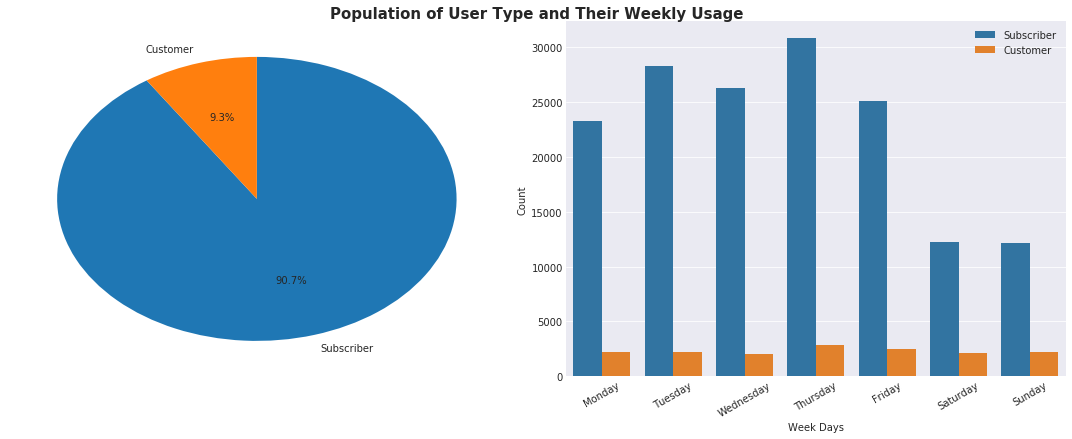

In [9]:
plt.figure(figsize=[15, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');
days_ordered=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_bike['start_dayofweek'] = pd.Categorical(df_bike['start_dayofweek'], categories=days_ordered, ordered=True)

plt.subplot(1, 2, 1);
user_type_count = df_bike.user_type.value_counts()/df_bike.shape[0];
plt.pie(user_type_count, labels=user_type_count.index, startangle=90, counterclock=False, autopct='%1.1f%%');
plt.tight_layout();

plt.subplot(1, 2, 2);
sb.countplot(data=df_bike, x='start_dayofweek', hue='user_type');
plt.legend(ncol=1);
plt.xticks(rotation=30);
plt.xlabel('Week Days');
plt.ylabel('Count');
plt.tight_layout();

plt.suptitle('Population of User Type and Their Weekly Usage',  fontsize=15, fontweight='bold',y=1.01);

## Hourly Usage during Weekdays for Customers and Subscribers
> Different usage patterns/habits between subscribers and customers. Subscribers rides heavily on work days, whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 7-9am and 4-6pm on work days for subscribers. This indicates that they use it for commuting to work. On the other hand, customershave a different usage purpose such that they use on afternoon during weekends and on rush hours during weekdays. This indicates that customers are not using just for communing to work purposes but also for adventures/luxurious purposes. 

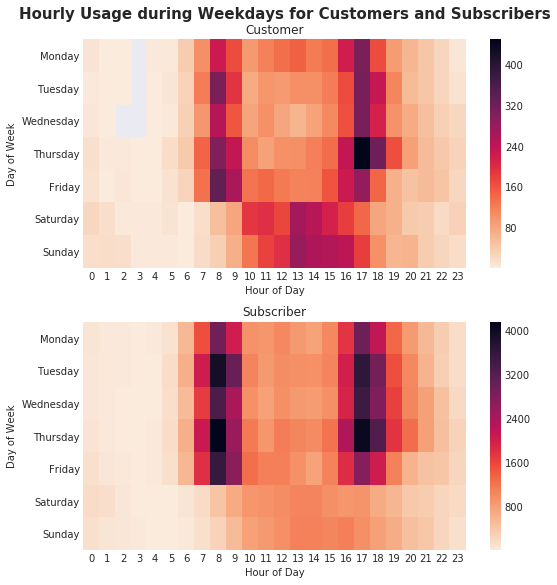

In [10]:
plt.figure(figsize=[8, 8]);

plt.subplot(2, 1, 1)
customers = df_bike.query('user_type == "Customer"')
ccounts = customers.groupby(['start_dayofweek', 'start_hourofday']).size()
ccounts = ccounts.reset_index(name='count')
ccounts = ccounts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(ccounts, cmap='rocket_r');
plt.title('Customer', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.subplot(2, 1, 2)
subscribers = df_bike.query('user_type == "Subscriber"')
scounts = subscribers.groupby(['start_dayofweek', 'start_hourofday']).size()
scounts = scounts.reset_index(name='count')
scounts = scounts.pivot(index='start_dayofweek', columns='start_hourofday', values='count')
sb.heatmap(scounts, cmap='rocket_r');
plt.title('Subscriber', loc='center');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');
plt.tight_layout();

plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers', fontsize=15, fontweight='bold',y=1.01);

## Gender Usage Difference in Weeks and Hour of the Day

> There are more male riders than female riders. Male riders uses more on work days, i.e. Monday to Friday and they use during rush hours, 7-9am and 4-6pm. Female riders also have similar patterns as male riders. They are likely to use during work days but not a big difference between weekends as like male riders. Female riders also likely to ride during rush hours, 7-9am and 4-6pm. Thus, male and female riders shares a similar pattern but male riders have more siginificant difference of usage between weekdays and weekends.

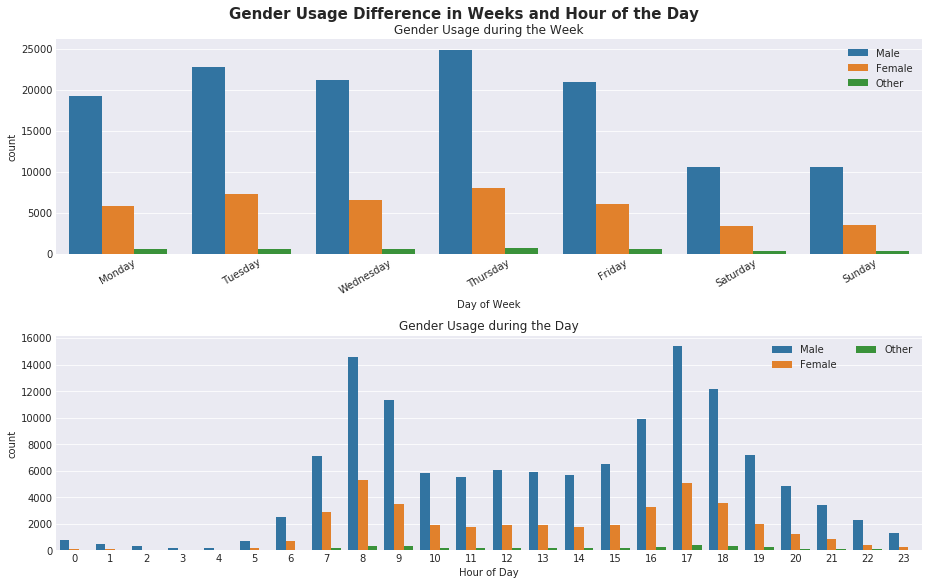

In [11]:
plt.figure(figsize = [13, 8]);

plt.subplot(2,1,1);
sb.countplot(data = df_bike, x = 'start_dayofweek', hue = 'member_gender');
plt.legend(ncol = 1);
plt.xticks(rotation=30);
plt.title("Gender Usage during the Week");
plt.xlabel("Day of Week");
plt.tight_layout();

plt.subplot(2, 1, 2);
sb.countplot(data = df_bike, x = 'start_hourofday', hue = 'member_gender');
plt.legend(ncol = 2);
plt.title("Gender Usage during the Day");
plt.xlabel("Hour of Day");
plt.tight_layout();

plt.suptitle('Gender Usage Difference in Weeks and Hour of the Day',fontsize=15,fontweight='bold',y=1.01);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt;

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 457732 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
